# **Importing Required Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# **Loading Dataset**

In [ ]:
df = pd.read_csv("/smmh.csv")
df.head(2).T

,0,1
Timestamp,4/18/2022 19:18:47,4/18/2022 19:19:28
1. What is your age?,21.0,21.0
2. Gender,Male,Female
3. Relationship Status,In a relationship,Single
4. Occupation Status,University Student,University Student
5. What type of organizations are you affiliated with?,University,University
6. Do you use social media?,Yes,Yes
7. What social media platforms do you commonly use?,"Facebook, Twitter, Instagram, YouTube, Discord...","Facebook, Twitter, Instagram, YouTube, Discord..."
8. What is the average time you spend on social media every day?,Between 2 and 3 hours,More than 5 hours
9. How often do you find yourself using Social media without a specific purpose?,5,4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Finding Missing Values**

In [ ]:

print([f"Nan values in: {(element, value)}" for (element, value) in zip(df.isnull().sum().index, df.isnull().sum()) if value > 0])

["Nan values in: ('5. What type of organizations are you affiliated with?', 30)"]


In [ ]:
df['missing'] = df['5. What type of organizations are you affiliated with?'].isnull().astype(int)


cross_tab = pd.crosstab(df['5. What type of organizations are you affiliated with?'], df['missing'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

Chi-Square Statistic: 0.0, P-value: 1.0


In [ ]:
df["5. What type of organizations are you affiliated with?"] = df["5. What type of organizations are you affiliated with?"].fillna(df["5. What type of organizations are you affiliated with?"].mode()[0])

# **Outliers**

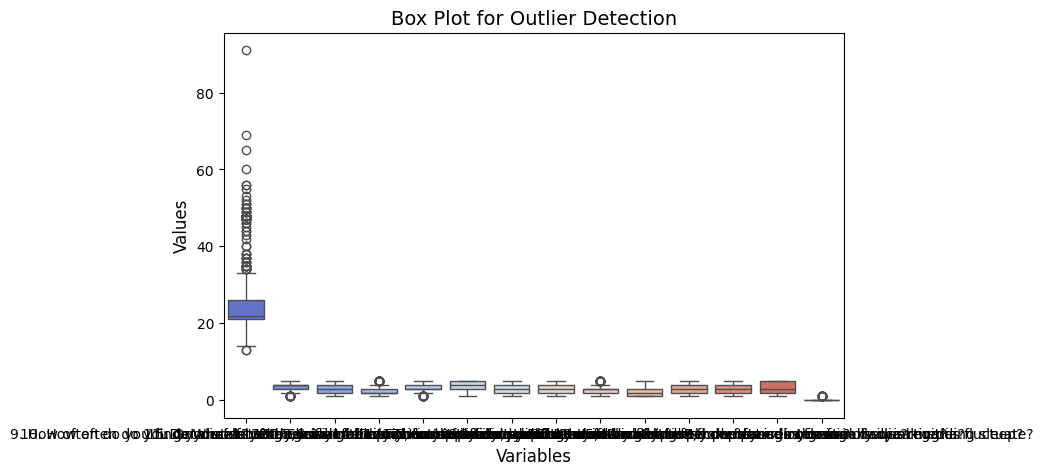

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, palette="coolwarm")

# Customize the plot
plt.title("Box Plot for Outlier Detection", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()

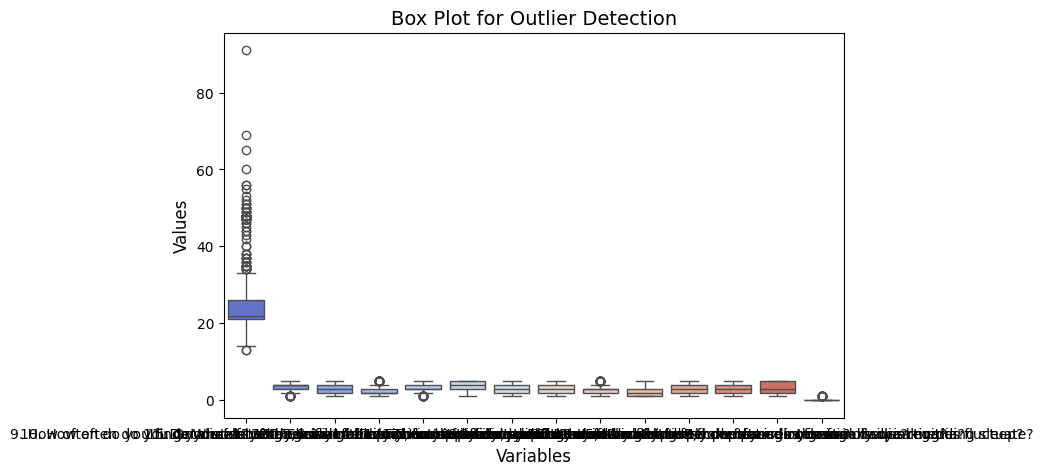

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, palette="coolwarm")

# Customize the plot
plt.title("Box Plot for Outlier Detection", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()

# **Social Media Usage Across All platforms**

In [ ]:

column_name = "8. What is the average time you spend on social media every day?"


df[column_name] = df[column_name].str.strip()


time_mapping = {
    "Less than an Hour": 0.5,
    "Between 1 and 2 hours": 1.5,
    "Between 2 and 3 hours": 2.5,
    "Between 3 and 4 hours": 3.5,
    "Between 4 and 5 hours": 4.5,
    "More than 5 hours": 6
}


df[column_name] = df[column_name].map(time_mapping)

print(df[[column_name]].head())

   8. What is the average time you spend on social media every day?
0                                                2.5               
1                                                6.0               
2                                                3.5               
3                                                6.0               
4                                                2.5               


In [ ]:

platforms_column = "7. What social media platforms do you commonly use?"


platforms = ["Facebook", "Twitter", "Instagram", "YouTube", "Snapchat", "Discord", "Reddit", "Pinterest", "TikTok"]


for platform in platforms:
    df[platform] = df[platforms_column].apply(lambda x: 1 if isinstance(x, str) and platform in x else 0)


df["Platform Score"] = df[platforms].sum(axis=1)


print(df[platforms + ["Platform Score"]].head())

   Facebook  Twitter  Instagram  YouTube  Snapchat  Discord  Reddit  \
0         1        1          1        1         0        1       1   
1         1        1          1        1         0        1       1   
2         1        0          1        1         0        0       0   
3         1        0          1        0         0        0       0   
4         1        0          1        1         0        0       0   

   Pinterest  TikTok  Platform Score  
0          0       0               6  
1          0       0               6  
2          1       0               4  
3          0       0               2  
4          0       0               3  


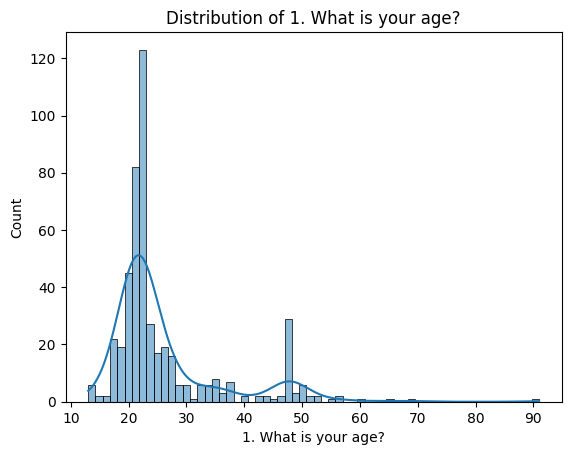

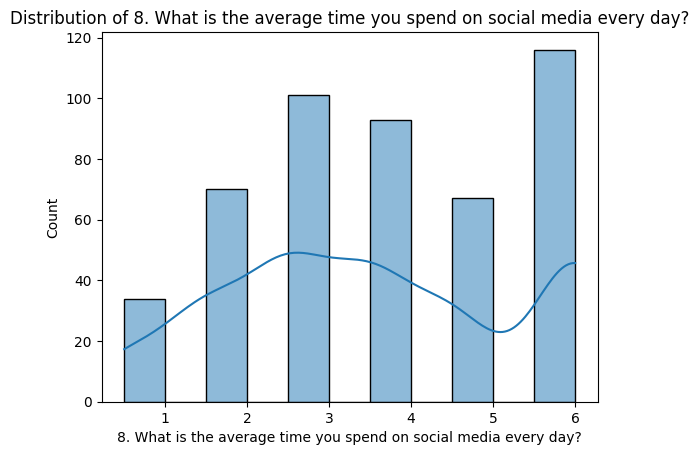

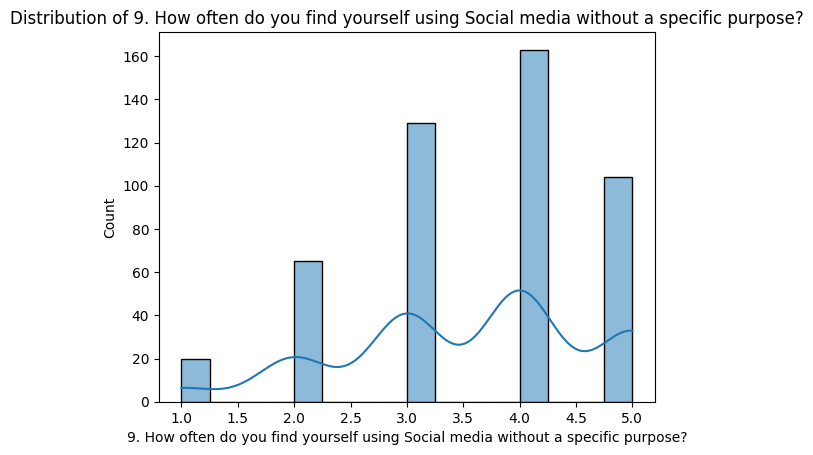

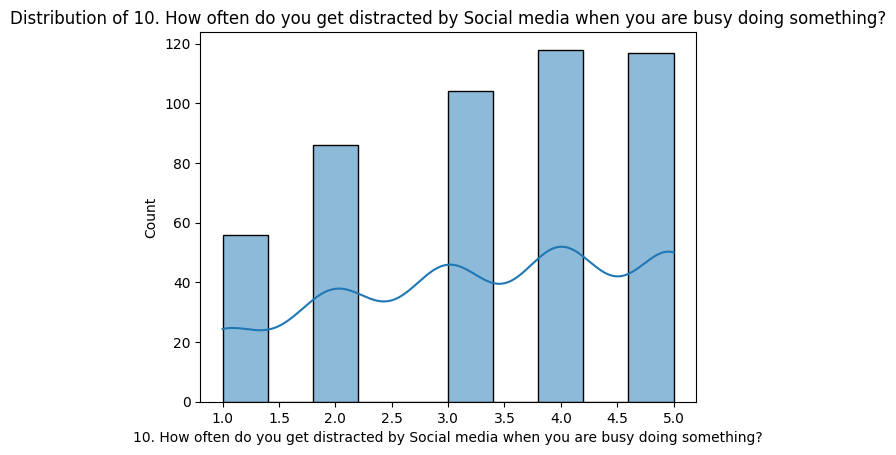

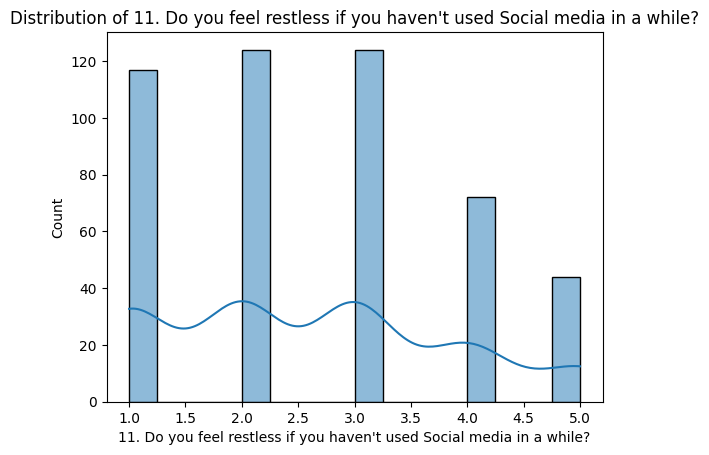

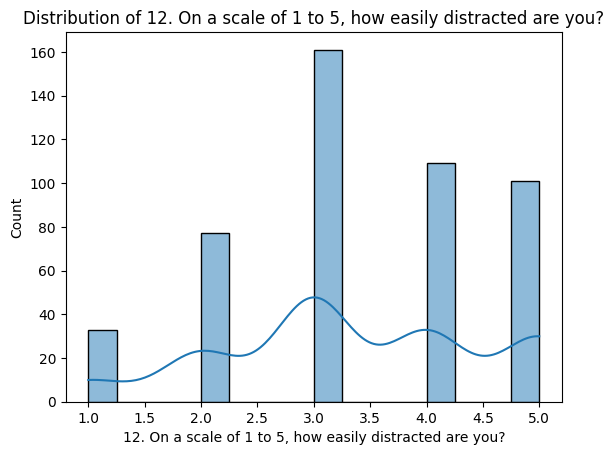

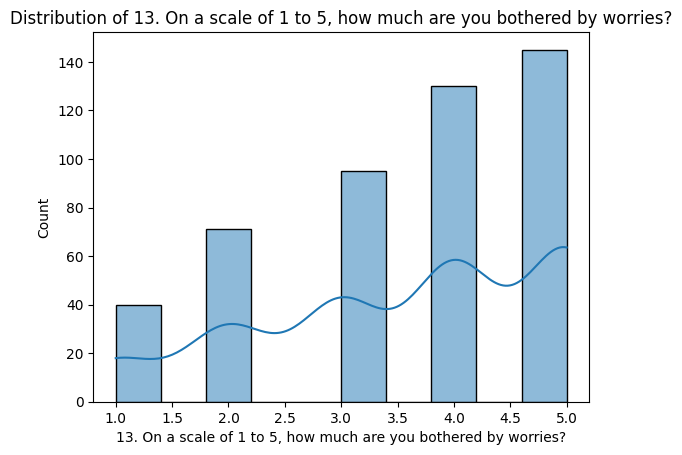

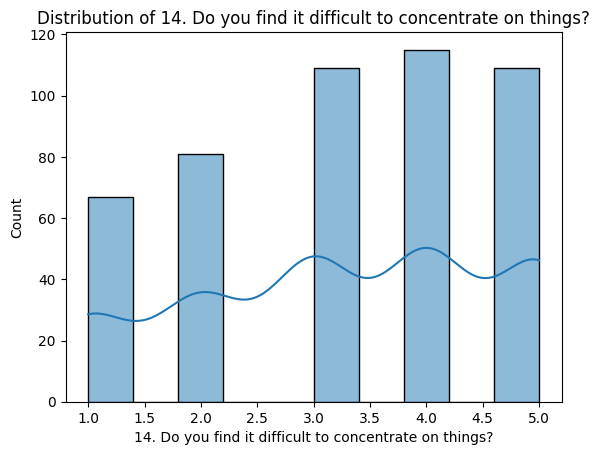

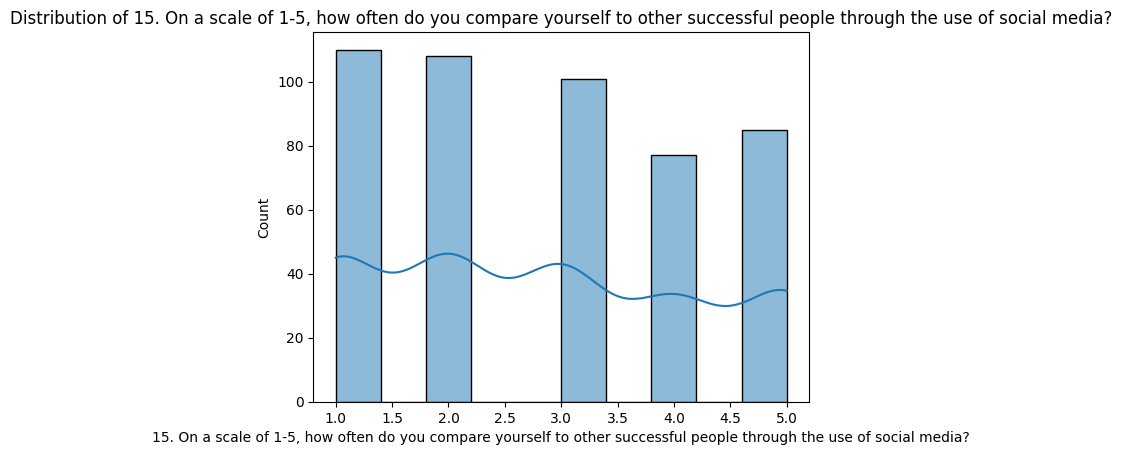

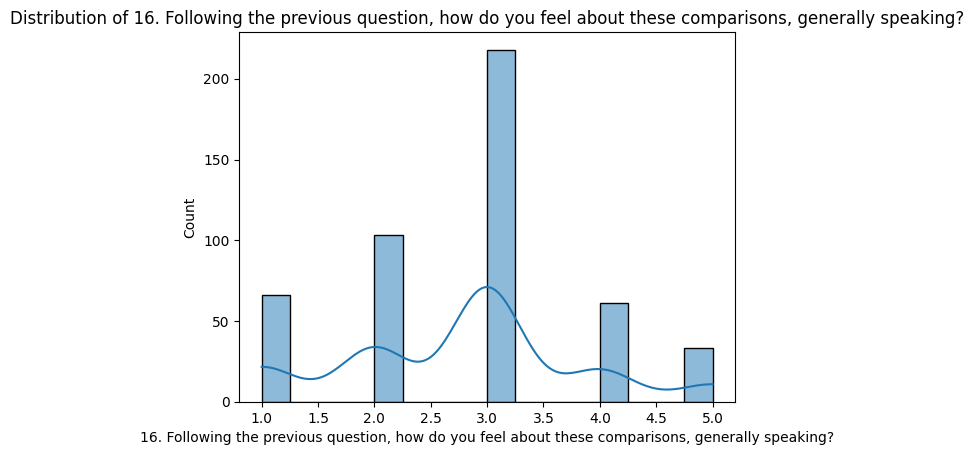

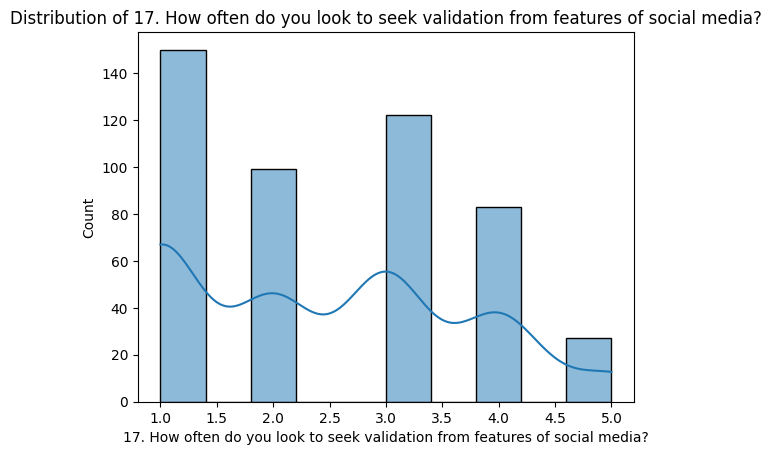

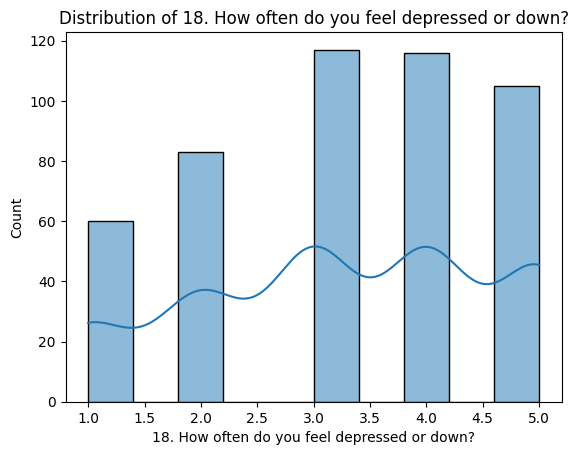

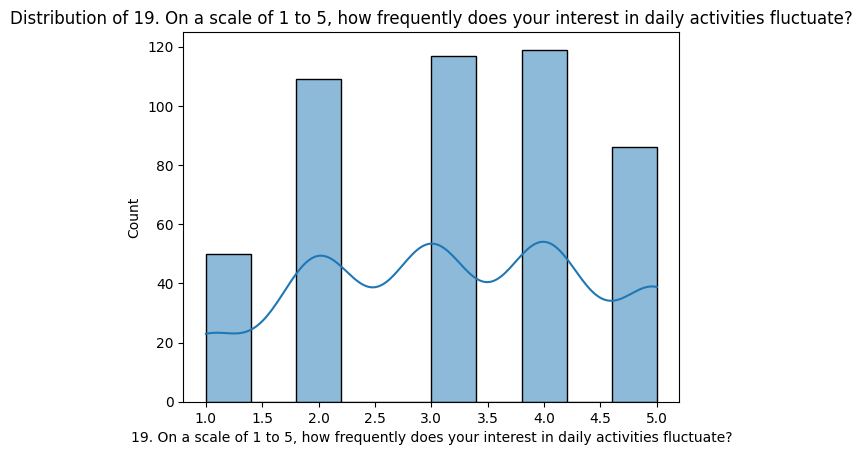

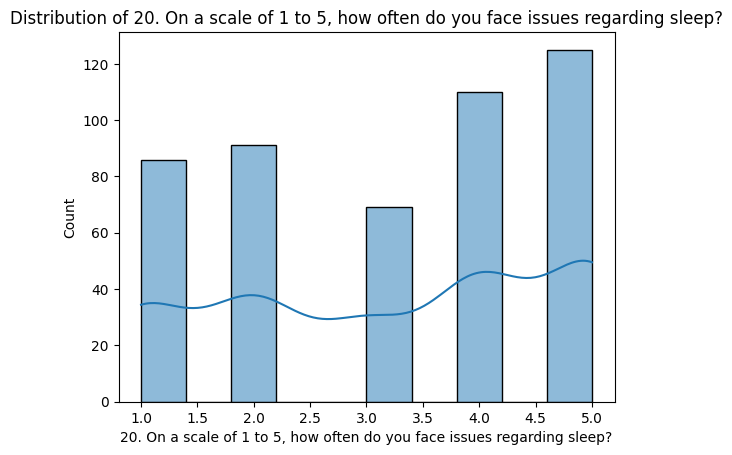

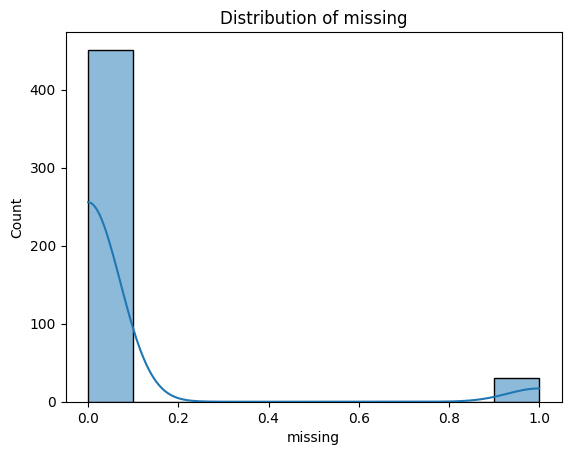

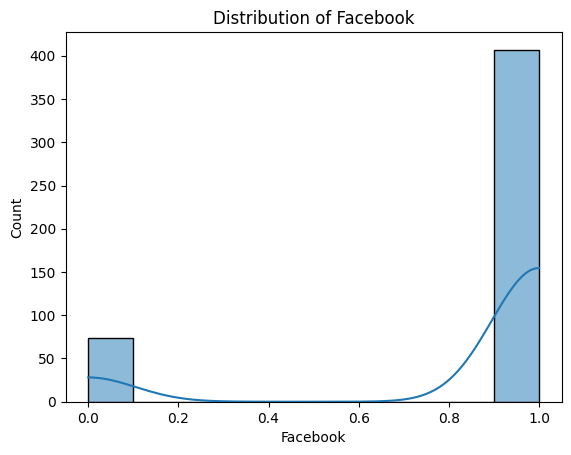

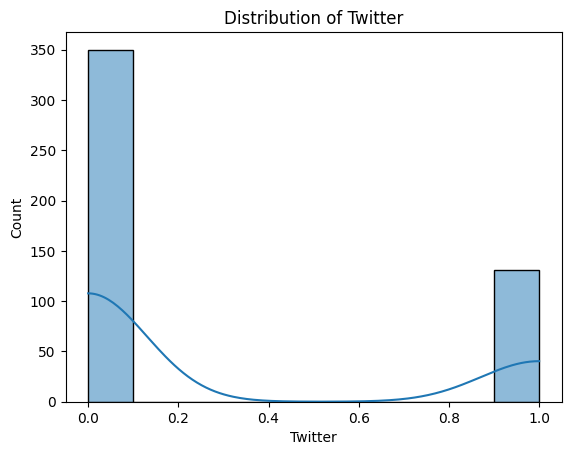

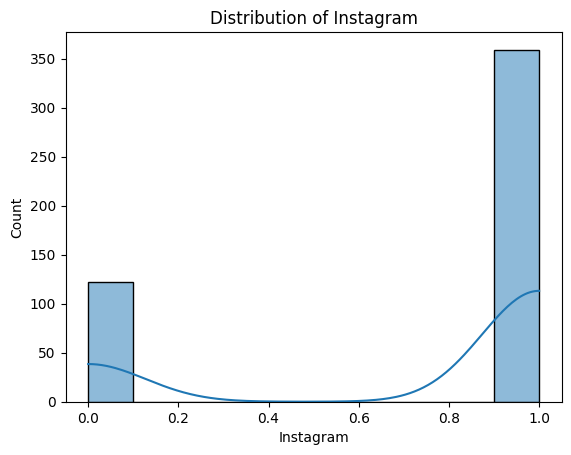

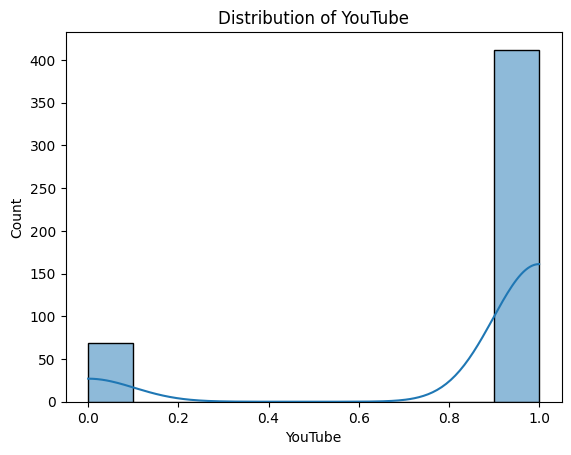

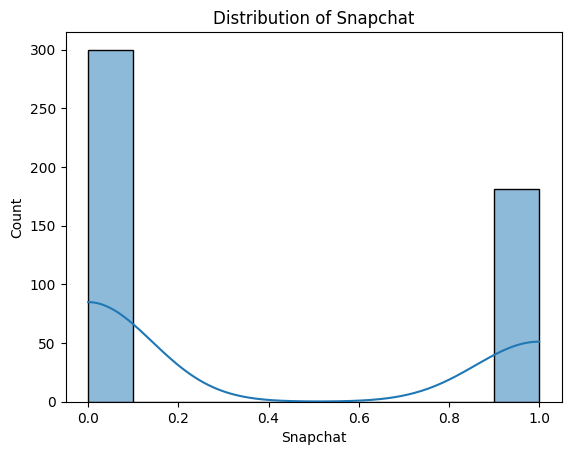

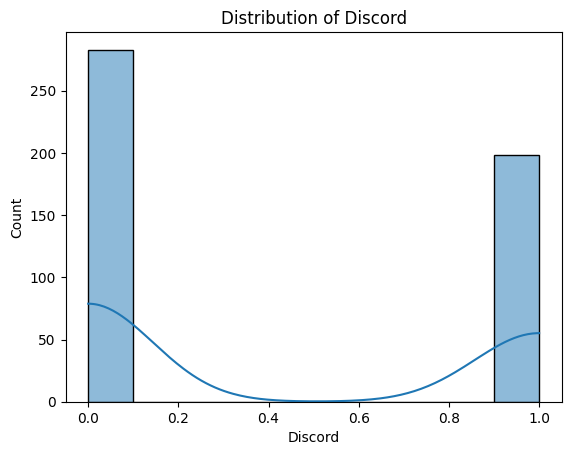

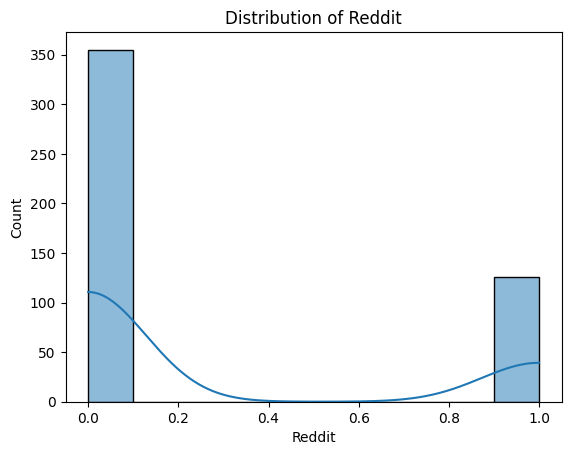

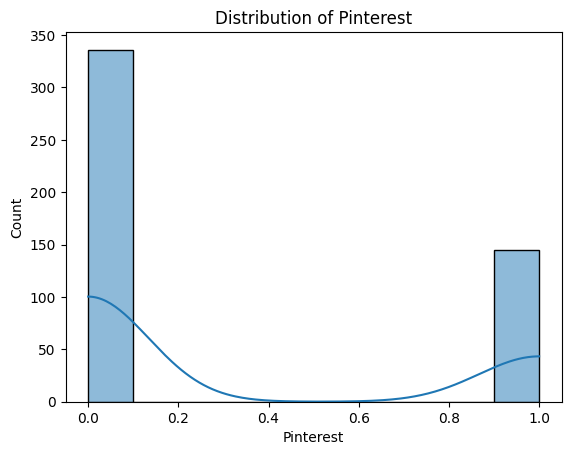

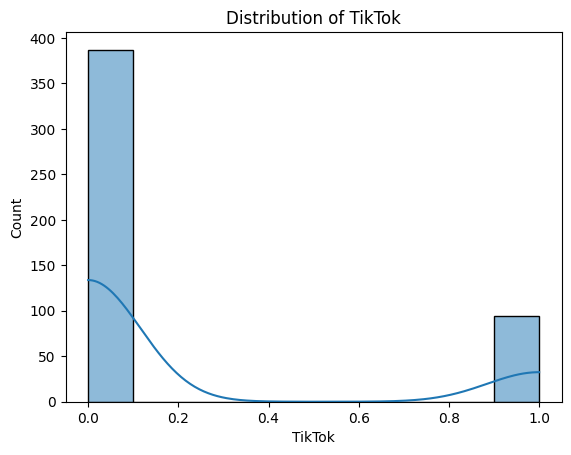

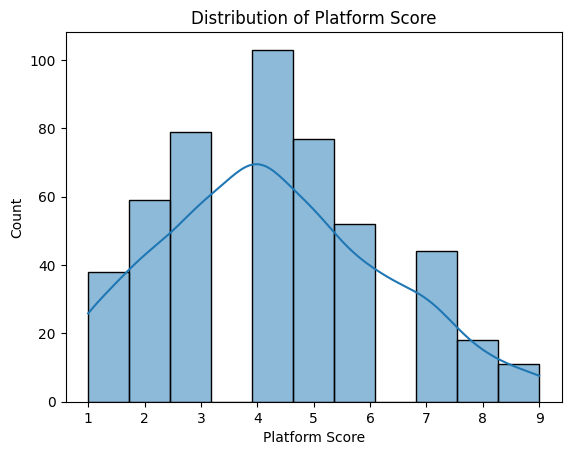

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

for column in df.select_dtypes(include=['number']).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

# **AGE Distribution Before and After Log Transformation**

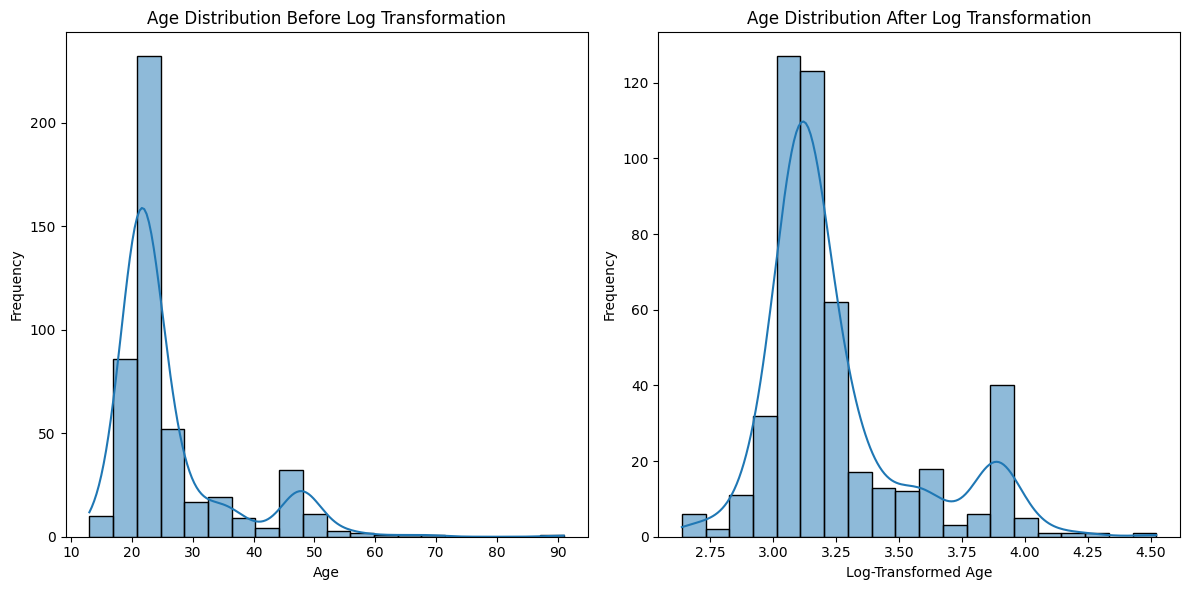

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['1. What is your age?'], bins=20, kde=True)
plt.title("Age Distribution Before Log Transformation")
plt.xlabel("Age")
plt.ylabel("Frequency")


df['log_transformed_age'] = np.log1p(df['1. What is your age?'])

plt.subplot(1, 2, 2)
sns.histplot(df['log_transformed_age'], bins=20, kde=True)
plt.title("Age Distribution After Log Transformation")
plt.xlabel("Log-Transformed Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

<ipython-input-18-32bb27aca8a7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")


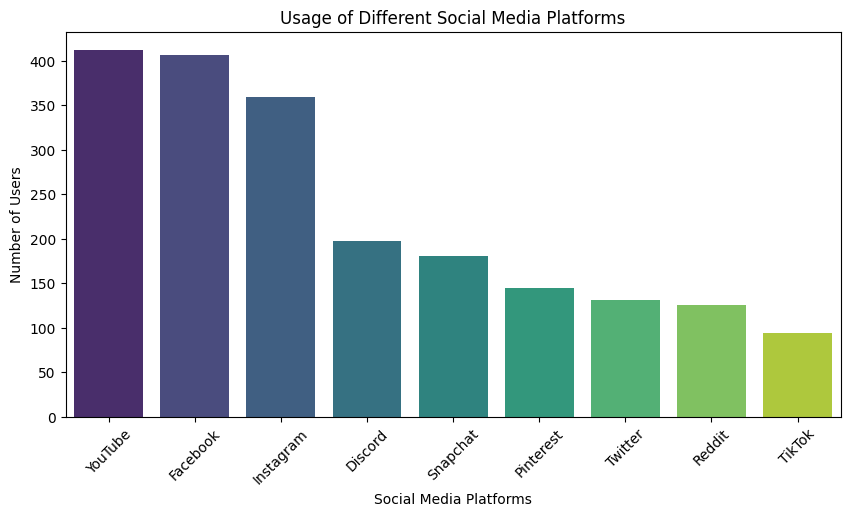

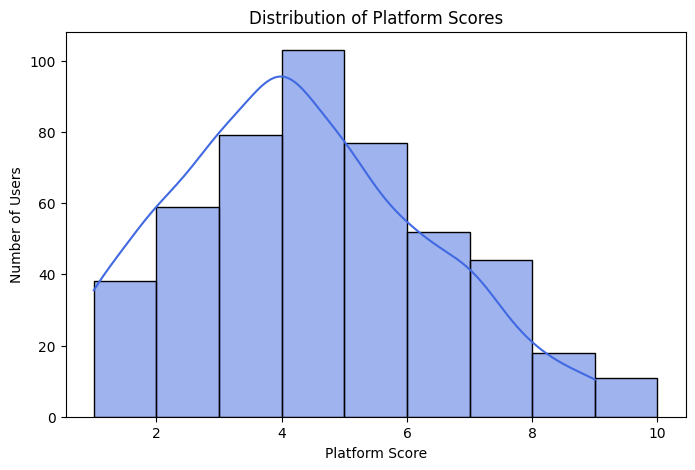

In [ ]:



platforms_column = "7. What social media platforms do you commonly use?"


platforms = ["Facebook", "Twitter", "Instagram", "YouTube", "Snapchat", "Discord", "Reddit", "Pinterest", "TikTok"]

for platform in platforms:
    df[platform] = df[platforms_column].apply(lambda x: 1 if isinstance(x, str) and platform in x else 0)


df["Platform Score"] = df[platforms].sum(axis=1)


plt.figure(figsize=(10, 5))
platform_counts = df[platforms].sum().sort_values(ascending=False)
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")
plt.xlabel("Social Media Platforms")
plt.ylabel("Number of Users")
plt.title("Usage of Different Social Media Platforms")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Platform Score"], bins=range(1, 11), kde=True, color="royalblue")
plt.xlabel("Platform Score")
plt.ylabel("Number of Users")
plt.title("Distribution of Platform Scores")
plt.show()


<ipython-input-19-14dd0ca055c9>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_platforms = df.groupby("Age Group")[platforms].sum()


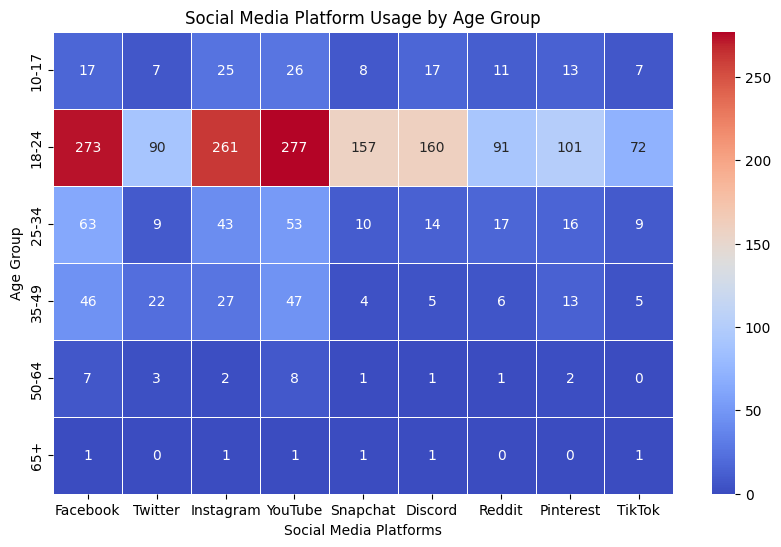

<Figure size 1200x600 with 0 Axes>

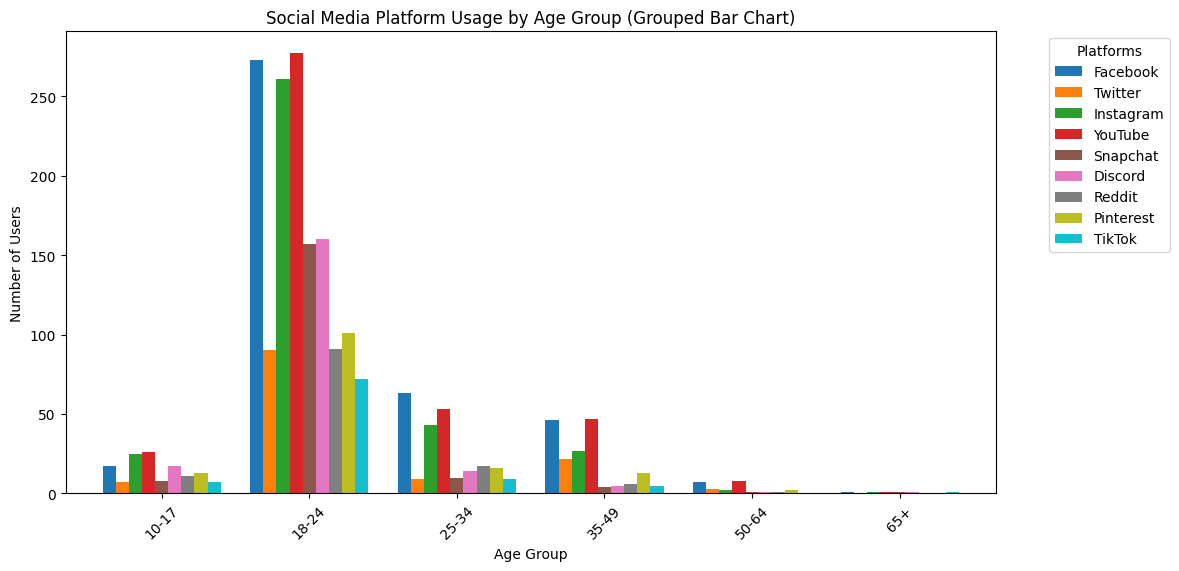

<Figure size 1000x500 with 0 Axes>

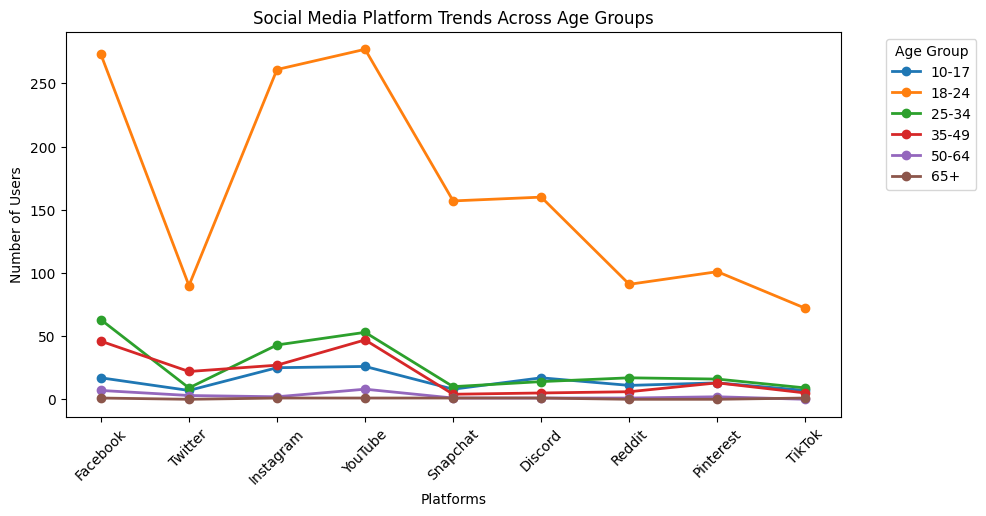

<ipython-input-19-14dd0ca055c9>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_platforms = df.groupby("Age Group")[platforms].sum()


<Figure size 1000x600 with 0 Axes>

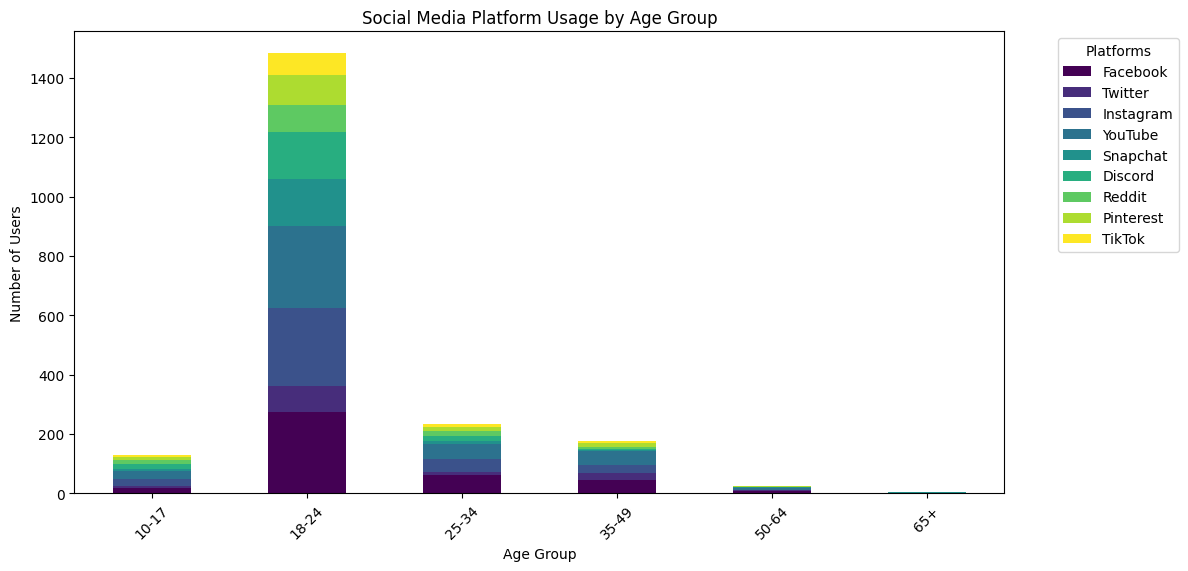

In [ ]:

age_column = "1. What is your age?"
platforms_column = "7. What social media platforms do you commonly use?"

platforms = ["Facebook", "Twitter", "Instagram", "YouTube", "Snapchat", "Discord", "Reddit", "Pinterest", "TikTok"]

for platform in platforms:
    df[platform] = df[platforms_column].apply(lambda x: 1 if isinstance(x, str) and platform in x else 0)


age_bins = [10, 18, 25, 35, 50, 65, 100]
age_labels = ["10-17", "18-24", "25-34", "35-49", "50-64", "65+"]
df["Age Group"] = pd.cut(df[age_column], bins=age_bins, labels=age_labels)


plt.figure(figsize=(10, 6))
age_platforms = df.groupby("Age Group")[platforms].sum()
sns.heatmap(age_platforms, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)
plt.xlabel("Social Media Platforms")
plt.ylabel("Age Group")
plt.title("Social Media Platform Usage by Age Group")
plt.show()

plt.figure(figsize=(12, 6))
age_platforms.plot(kind="bar", colormap="tab10", figsize=(12, 6), width=0.8)
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Social Media Platform Usage by Age Group (Grouped Bar Chart)")
plt.xticks(rotation=45)
plt.legend(title="Platforms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
age_platforms.T.plot(kind="line", marker="o", figsize=(10, 5), linewidth=2)
plt.xlabel("Platforms")
plt.ylabel("Number of Users")
plt.title("Social Media Platform Trends Across Age Groups")
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10, 6))
age_platforms = df.groupby("Age Group")[platforms].sum()
age_platforms.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 6))
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.title("Social Media Platform Usage by Age Group")
plt.legend(title="Platforms", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


We can see that the usage of Facebook and YouTube is high for all age groups. Big differences occur for platforms like Instagram, Snapchat, TikTok and Discord, where especially the group 31-40 years is underrepresented.

# **Feature Transformation and Regression Analysis**

In [ ]:

social_media_columns = [

    "9. How often do you find yourself using Social media without a specific purpose?",
   "8. What is the average time you spend on social media every day?",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?",
    "10. How often do you get distracted by Social media when you are busy doing something?"
]

impact_columns = [
   "12. On a scale of 1 to 5, how easily distracted are you?",
   "13. On a scale of 1 to 5, how much are you bothered by worries?",
   "14. Do you find it difficult to concentrate on things?",
   "18. How often do you feel depressed or down?",
"16. Following the previous question, how do you feel about these comparisons, generally speaking?",
   "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?",
   "20. On a scale of 1 to 5, how often do you face issues regarding sleep?",
   "17. How often do you look to seek validation from features of social media?",
   "11. Do you feel restless if you haven't used Social media in a while?"


]

# Create new features
df["social_media"] = df[social_media_columns].sum(axis=1)
df["impact"] = df[impact_columns].sum(axis=1)


# Display the first few rows to verify
print(df[["social_media", "impact"]])

     social_media  impact
0            12.5      33
1            18.0      31
2            11.5      27
3            17.0      24
4            13.5      33
..            ...     ...
476          13.5      31
477           8.5      28
478          11.5      25
479           9.5      30
480           8.5      18

[481 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["social_media", "impact"]] = scaler.fit_transform(df[["social_media", "impact"]])

Mean Squared Error: 0.4621
R² Score: 0.5559
Adjusted R² Score: 0.5512
Intercept: -0.0118
Coefficient (Slope): 0.6777


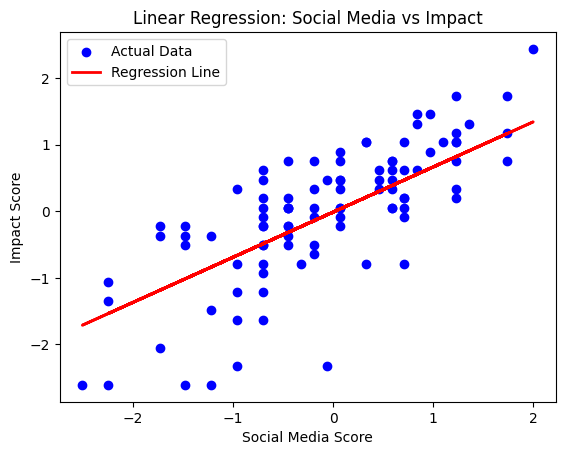

Predicted Impact for Social Media Score 10: 6.7655


In [ ]:
# Ensure 'social_media' is a DataFrame with a single column
X = df[["social_media"]]  # Independent variable as DataFrame
y = df["impact"]  # Dependent variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Compute Adjusted R²
n = X_test.shape[0]  # Number of test samples
p = X_test.shape[1]  # Number of independent variables (predictors)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")

# Visualizing the regression line
plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Social Media Score")
plt.ylabel("Impact Score")
plt.title("Linear Regression: Social Media vs Impact")
plt.legend()
plt.show()

# Predict impact for a new social media score
new_social_media_score = 10  # Change this value for prediction
new_data = pd.DataFrame({"social_media": [new_social_media_score]})
predicted_impact = model.predict(new_data)
print(f"Predicted Impact for Social Media Score {new_social_media_score}: {predicted_impact[0]:.4f}")

Durbin-Watson Statistic: 2.077212249222952


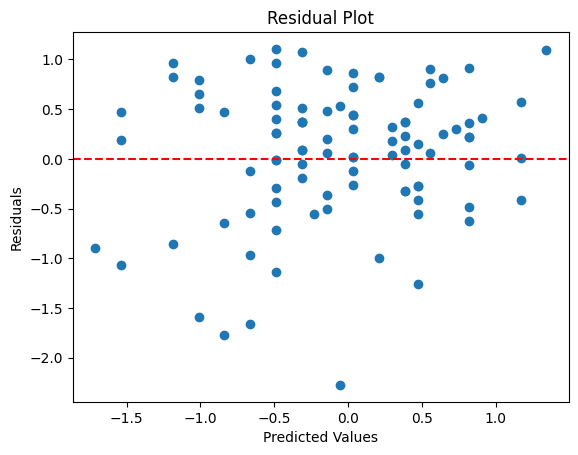

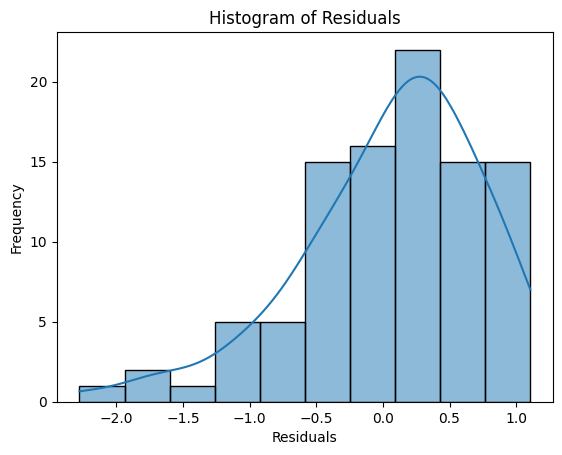

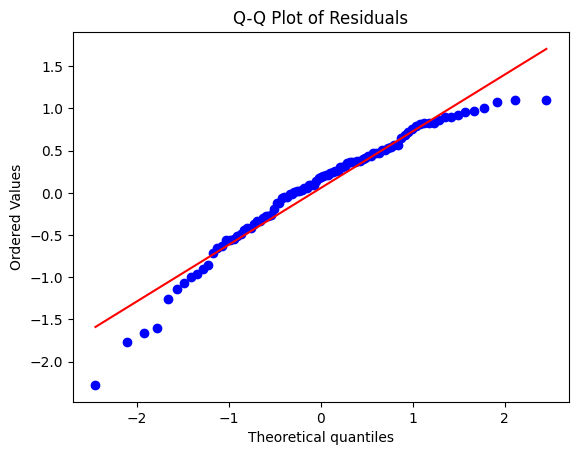

In [ ]:

X = df[['social_media']]
y = df['impact']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic}")

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()


stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()



=== Sklearn Regression Results ===
Mean Squared Error: 0.4621
R² Score (Test Data): 0.5559
Adjusted R² Score (Test Data): 0.5512
Intercept: -0.0118
Coefficient (Slope): 0.6777


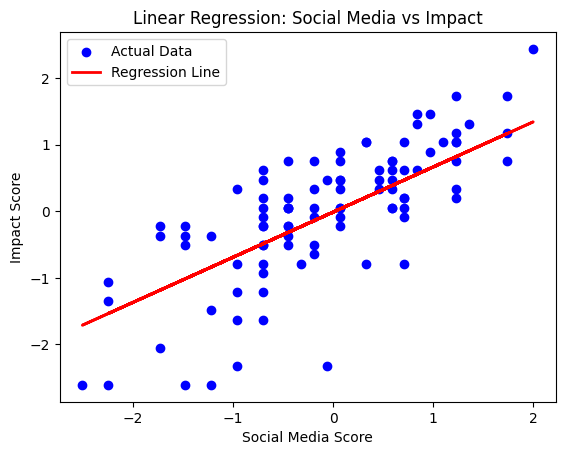


=== OLS Regression Summary (Training Data) ===
                            OLS Regression Results                            
Dep. Variable:                 impact   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           4.14e-54
Time:                        01:06:02   Log-Likelihood:                -422.17
No. Observations:                 384   AIC:                             848.3
Df Residuals:                     382   BIC:                             856.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------


In [ ]:


X = df[["social_media"]]
y = df["impact"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))


print("\n=== Sklearn Regression Results ===")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score (Test Data): {r2:.4f}")
print(f"Adjusted R² Score (Test Data): {adjusted_r2:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficient (Slope): {model.coef_[0]:.4f}")

plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Social Media Score")
plt.ylabel("Impact Score")
plt.title("Linear Regression: Social Media vs Impact")
plt.legend()
plt.show()



X_train_ols = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_ols).fit()


print("\n=== OLS Regression Summary (Training Data) ===")
print(ols_model.summary())


X_test_ols = sm.add_constant(X_test)
y_pred_ols = ols_model.predict(X_test_ols)


r2_test_ols = r2_score(y_test, y_pred_ols)
adjusted_r2_test_ols = 1 - ((1 - r2_test_ols) * (n - 1) / (n - p - 1))

print("\n=== OLS R² for Test Data ===")
print(f"OLS Test R² Score: {r2_test_ols:.4f}")
print(f"OLS Adjusted R² Score: {adjusted_r2_test_ols:.4f}")


new_social_media_score = 10
new_data = pd.DataFrame({"social_media": [new_social_media_score]})
predicted_impact = model.predict(new_data)
print(f"Predicted Impact for Social Media Score {new_social_media_score}: {predicted_impact[0]:.4f}")


# **One Variate Summary Statistics**

Summary Statistics:
       1. What is your age?  \
count             481.00000   
mean               26.13659   
std                 9.91511   
min                13.00000   
25%                21.00000   
50%                22.00000   
75%                26.00000   
max                91.00000   

       8. What is the average time you spend on social media every day?  \
count                                         481.000000                  
mean                                            3.529106                  
std                                             1.755107                  
min                                             0.500000                  
25%                                             2.500000                  
50%                                             3.500000                  
75%                                             4.500000                  
max                                             6.000000                  

       9. How often do y

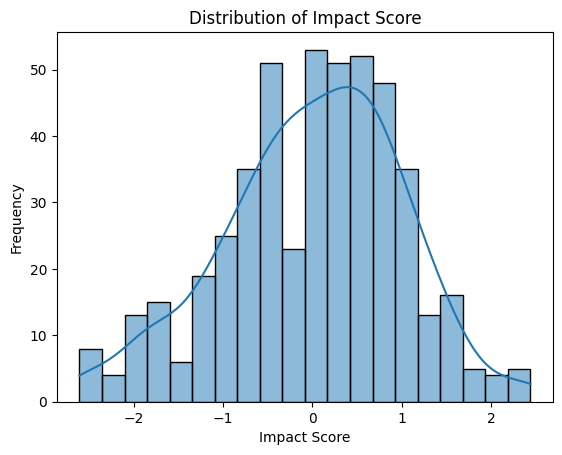

In [ ]:

print("Summary Statistics:")
print(df.describe())


import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["impact"], bins=20, kde=True)
plt.title("Distribution of Impact Score")
plt.xlabel("Impact Score")
plt.ylabel("Frequency")
plt.show()


# Correlation

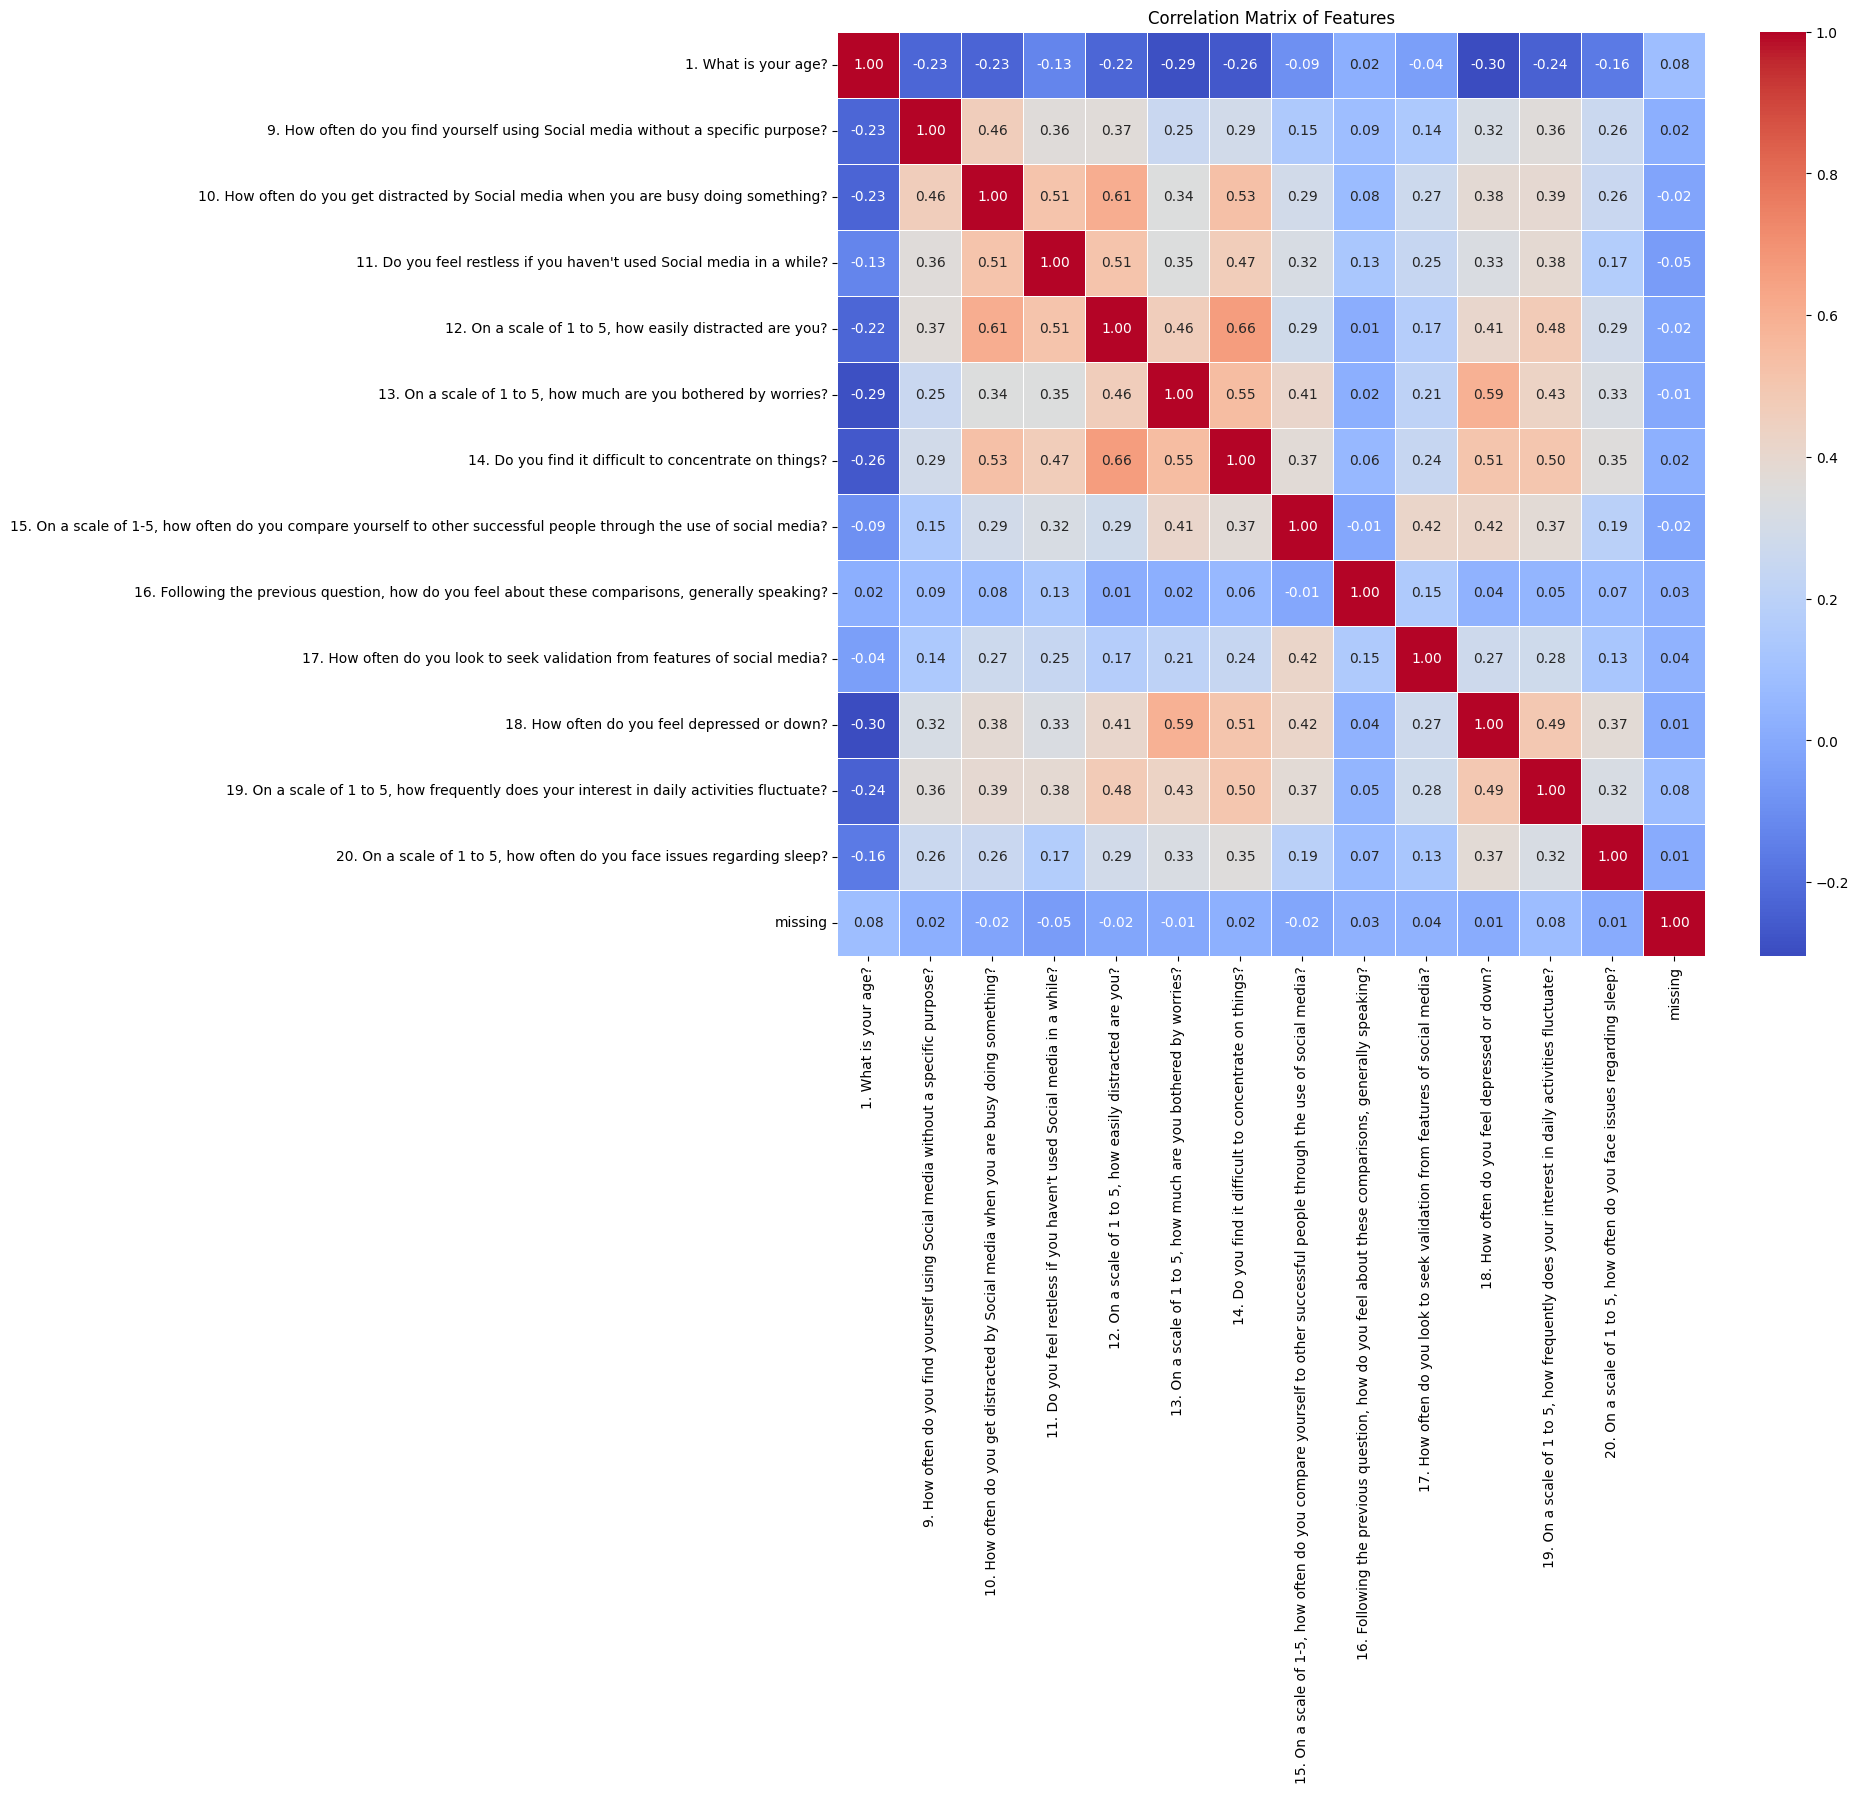

In [ ]:

correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

The correlation analysis reveals moderate to strong relationships between social media usage behaviors and mental health indicators. Higher distraction levels due to social media usage show a positive correlation (0.61) with difficulty in concentration, while validation-seeking and social comparison are linked to increased feelings of depression and anxiety. These findings support the hypothesis that excessive social media engagement contributes to mental health challenges, such as reduced focus, increased stress, and emotional instability.

Correlation between social_media and impact: 0.6971
P-value: 0.0000


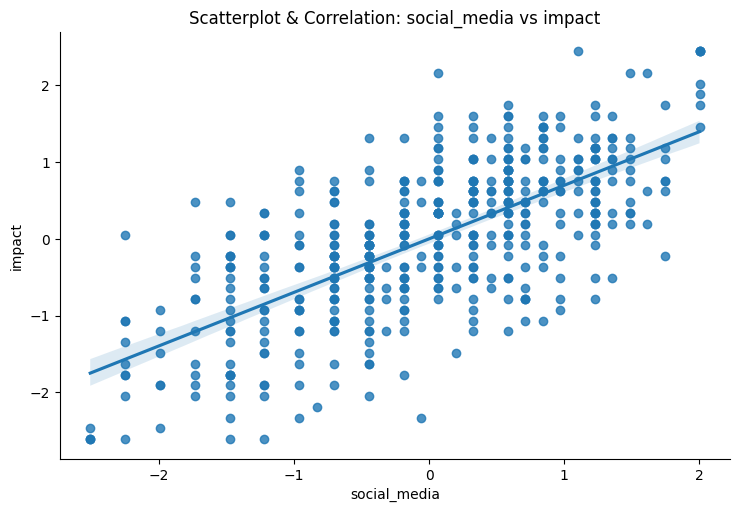

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # Ensure scipy is installed

var1 = "social_media"  # Update with actual column name
var2 = "impact"  # Update with actual column name

if var1 in df.columns and var2 in df.columns:
    df[var1] = pd.to_numeric(df[var1], errors="coerce")
    df[var2] = pd.to_numeric(df[var2], errors="coerce")

    df_cleaned = df[[var1, var2]].dropna()

    correlation, p_value = pearsonr(df_cleaned[var1], df_cleaned[var2])

    print(f"Correlation between {var1} and {var2}: {correlation:.4f}")
    print(f"P-value: {p_value:.4f}")

    sns.lmplot(x=var1, y=var2, data=df_cleaned, height=5, aspect=1.5)
    plt.title(f"Scatterplot & Correlation: {var1} vs {var2}")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
else:
    print(f"Error: One or both variables ({var1}, {var2}) not found in the dataset!")

The correlation analysis shows a strong positive relationship (r = 0.6971, p < 0.001) between social media usage and its impact on mental health. This indicates that as social media usage increases, the negative effects on mental health, such as distraction, stress, and emotional instability, also tend to rise. These findings support the hypothesis that social media engagement significantly influences mental well-being, reinforcing the need for awareness and potential regulation of usage patterns.